# Code: SPARC Marker Paper

## Import librairies

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(
    font="Calibri",
    rc={
        "axes.axisbelow": False,
        "axes.edgecolor": "lightgrey",
        "axes.facecolor": "None",
        "axes.grid": False,
        "axes.labelcolor": "dimgrey",
        "axes.spines.right": True,
        "axes.spines.top": False,
        "figure.facecolor": "white",
        "lines.solid_capstyle": "round",
        "patch.edgecolor": "w",
        "patch.force_edgecolor": True,
        "text.color": "dimgrey",
        "xtick.bottom": False,
        "xtick.color": "dimgrey",
        "xtick.direction": "out",
        "xtick.top": False,
        "ytick.color": "dimgrey",
        "ytick.direction": "out",
        "ytick.left": False,
        "ytick.right": False,
    },
)
sns.set_context(
    "notebook", rc={"font.size": 14, "axes.titlesize": 14, "axes.labelsize": 14}
)

## Set constants

In [2]:
color1 = "#24245b"
color2 = "#8300BF"
color3 = "#0026ff"
my_colors = [color1, color2, color3]

## General functions

In [3]:
def create_folder_if_not_exist(folder_path):
    """
    Create a folder at the path specified by folder_path
    if such a folder does not exist

    Args:
        folder_path: full path of the folder to create

    Returns:
        folder_path: full path of the folder created

    """
    if not os.path.isdir(folder_path):
        os.mkdir(folder_path)
    return folder_path


def save_image(fig, folder_path, plot_name, output_format):
    """
    Save a matplotlib fig to png image file

    Args:
        fig: matplotlib fig object
        folder_path: full path of the folder where image will be created
        plot_name: name of the image file to be created
        output_format: format of the image file to be created
                        ('png' or 'svg' typically)

    Returns:
        'Saved successfully'

    """
    folder_path = create_folder_if_not_exist(folder_path)
    file_name = plot_name + "." + output_format
    file_path = os.path.join(folder_path, file_name)
    fig.savefig(file_path, bbox_inches="tight")
    return "Saved successfully"

## Plot SPARC publication and citation counts

### Import data

In [4]:
datafilename = "sparc-publications-citations-counts.xlsx"
datafilepath = os.path.join("input", "dataset", "primary", datafilename)
df = pd.read_excel(datafilepath)
display(df)

,Year,Total publications by year published,Cumulative number of publications,Total citations by year cited,Cumulative number of citations,Relative Citation Ratio (RCR)
0,2015,2,2,1,1,0.71
1,2016,4,6,12,13,9.04
2,2017,33,39,117,130,121.47
3,2018,70,109,433,563,140.12
4,2019,77,186,988,1551,165.05
5,2020,82,268,1616,3167,129.80
6,2021,107,375,2459,5626,164.87
7,2022,108,483,2675,8301,109.96
8,2023,77,560,2874,11175,NaN


### Plot: Publication and citation count

'Saved successfully'

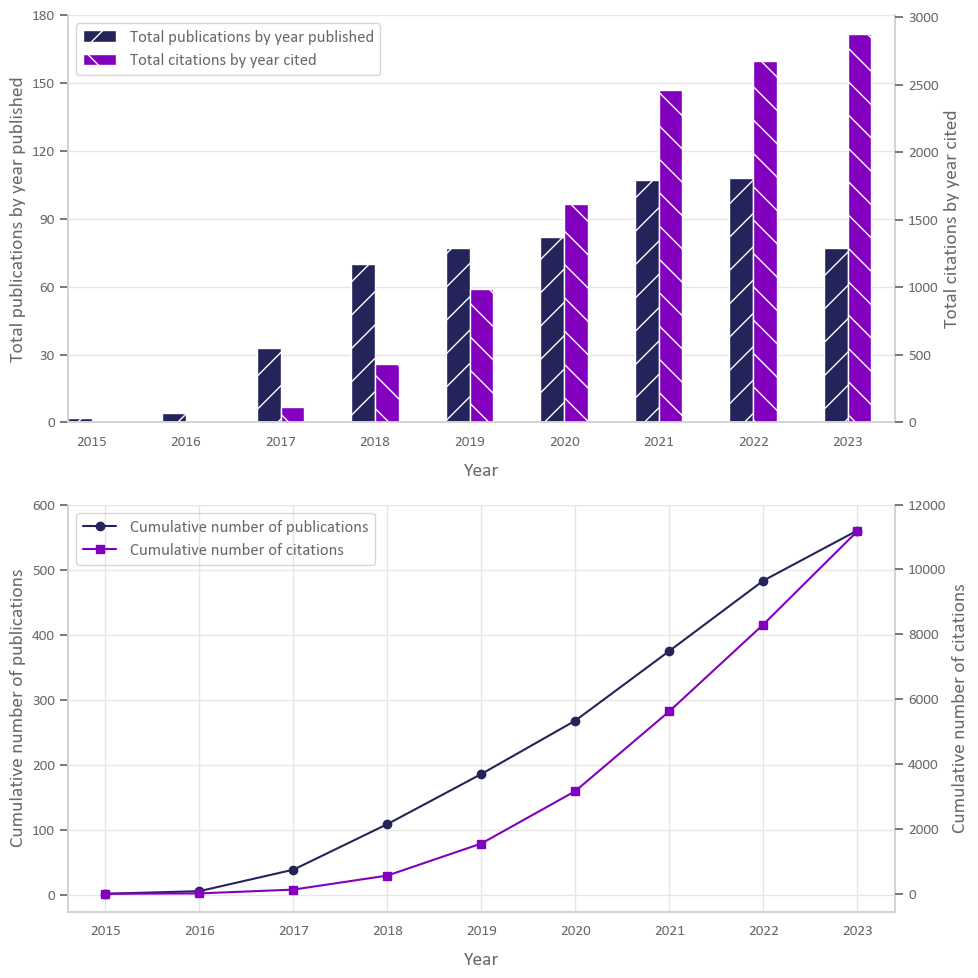

In [5]:
# Initialize figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

## First subplot: Publication counts, RCR, and citation counts by year publibhed

# Add data
ax12 = ax1.twinx() 
width = 0.25
x = "Year"
y1_label = "Total publications by year published"
y12_label = "Total citations by year cited"
df.plot(x, y1_label, ax=ax1, kind="bar", color=color1, hatch="/", width=width, position=1, legend = False)
df.plot(x, y12_label, ax=ax12, kind="bar", color=color2, hatch="\\", width=width, position=0)

# Set axis labels
ax1.set_ylabel(y1_label)
ax12.set_ylabel(y12_label) 
ax1.set_xlabel(x, labelpad=10)

# Set axis ticks
y1_range = np.linspace(0, 180, num=7)
y12_range = np.linspace(0, 3000, num=7)
ax1.set_yticks(y1_range)
ax12.set_yticks(y12_range)
xlabels = df[x].values
ax1.set_xticklabels(xlabels, rotation = 0)

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines12, labels12 = ax12.get_legend_handles_labels()
ax12.legend(lines1 + lines12, labels1 + labels12, loc=0, fontsize = 12)

# Add grid
ax1.grid(axis='y', color='0.9')
ax1.set_axisbelow(True) # move grid lines below the plot

## Second subplot: Cumulative publication and citation counts by year

# Add data
ax22 = ax2.twinx() 
y2_label = "Cumulative number of publications"
y22_label = "Cumulative number of citations"
df.plot(x, y2_label, ax=ax2, kind="line", color=color1, marker = 'o', markersize = 6, legend = False)
df.plot(x, y22_label, ax=ax22, kind="line", color=color2, marker = 's', markersize = 6)

# Set axis labels
ax2.set_ylabel(y2_label)
ax22.set_ylabel(y22_label) 
ax2.set_xlabel(x, labelpad=10)

# Set axis ticks
y2_range = np.linspace(0, 600, num=7)
y22_range = np.linspace(0, 12000, num=7)
ax2.set_yticks(y2_range)
ax22.set_yticks(y22_range)

# Add legend
lines2, labels2 = ax2.get_legend_handles_labels()
lines22, labels22 = ax22.get_legend_handles_labels()
ax22.legend(lines2 + lines22, labels2 + labels22, loc=2, fontsize = 12)

# Add grid
ax2.grid(color='0.9')
ax2.set_axisbelow(True)

## Save figure
fig.tight_layout()
save_image(fig, 'output', 'publications-citations', 'png')

## Plot NIH awards related to bioelectronic medecines

### Import data

In [7]:
datafilename = "nih-awards-bioelectronic-medicines.xlsx"
datafilepath = os.path.join("input", "dataset", "primary", datafilename)
df = pd.read_excel(datafilepath)
display(df)

,Fiscal year,SPARC awards ($M),NIH bieletronic medicine related awards outside of SPARC ($M),NIH total bieletronic medicine related awards ($M),"Total NIH Extramural, OT, and administrative supplement spending ($M)",% Total NIH without SPARC,% Total NIH with SPARC
0,2014,0.000000,187.5035,187.503500,21787.911711,0.860585,0.860585
1,2015,2.476757,198.0920,200.568757,21960.138986,0.902053,0.913331
2,2016,16.462020,217.3929,233.854920,23508.393883,0.924746,0.994772
3,2017,32.772150,233.6884,266.460550,24974.721652,0.935700,1.066921
4,2018,38.564870,279.4450,318.009870,27079.258017,1.031952,1.174367
5,2019,38.979510,283.8190,322.798510,29427.180156,0.964479,1.096940
6,2020,31.821270,308.2180,340.039270,32871.535474,0.937644,1.034449
7,2021,29.664900,307.3413,337.006200,33606.488226,0.914530,1.002801
8,2022,20.187540,333.0823,353.269840,34735.405312,0.958913,1.017031
9,2023,30.394010,368.2223,398.616310,35676.524894,1.032114,1.117307


### Plot: NIH awards related to bioelectronic medicines

'Saved successfully'

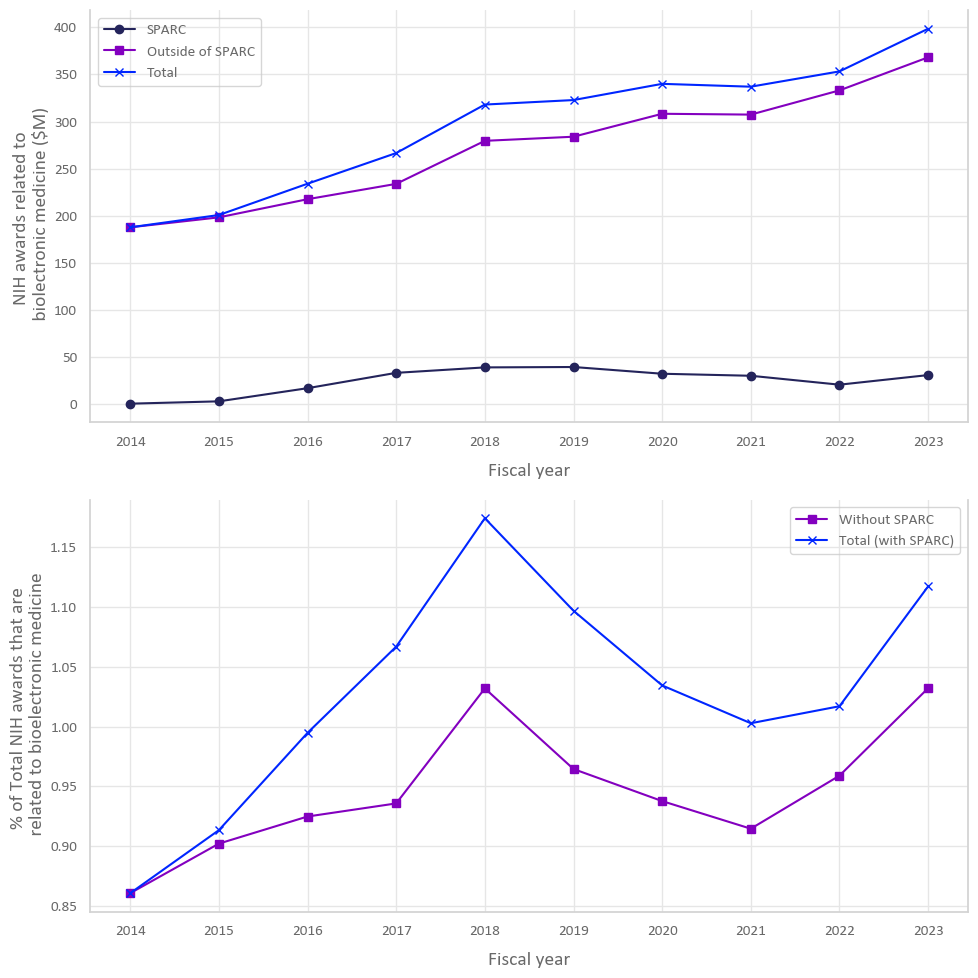

In [8]:
# Initialize figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
marker = ["o", "s", "x"]

## First subplot: NIH awards related to bioelectronic medecines in $

# Add data
x = "Fiscal year"
df.plot(x, "SPARC awards ($M)", 
        ax=ax1, kind="line", color=color1, marker = marker[0], label = "SPARC")
df.plot(x, "NIH bieletronic medicine related awards outside of SPARC ($M)", 
        ax=ax1, kind="line", color=color2, marker = marker[1], label = "Outside of SPARC")
df.plot(x, "NIH total bieletronic medicine related awards ($M)", 
        ax=ax1, kind="line", color=color3, marker = marker[2], label = "Total")
    
# Set axis labels
ax1.set_ylabel("NIH awards related to \n biolectronic medicine ($M)")
ax1.set_xlabel(x, labelpad = 10)

# Set axis ticks
ax1.set_xticks(df[x])

# Add grid
ax1.grid(color='0.9')
ax1.set_axisbelow(True) # move grid lines below the plots

## Second subplot: NIH awards related to bioelectronic medecines in %

# Add data
df.plot(x, "% Total NIH without SPARC", 
        ax=ax2, kind="line", color=color2, marker = "s", label = "Without SPARC")
df.plot(x, "% Total NIH with SPARC", 
        ax=ax2, kind="line", color=color3, marker = "x", label = "Total (with SPARC)")

# Set axis labels
ax2.set_ylabel("% of Total NIH awards that are \n related to bioelectronic medicine")
ax2.set_xlabel(x, labelpad = 10)

# Set axis ticks
ax2.set_xticks(df[x])

# Add grid
ax2.grid(color='0.9')
ax2.set_axisbelow(True) # move grid lines below the plots

## Save figure
fig.tight_layout()
save_image(fig, 'output', 'nih-awards-bioelectronic-medicines', 'png')

### Interesting learnings

In [9]:
x = "Fiscal year"
nih_total_2014 = df.loc[df[x] == 2014, "Total NIH Extramural, OT, and administrative supplement spending ($M)"].iloc[0]
nih_total_2023 = df.loc[df[x] == 2023, "Total NIH Extramural, OT, and administrative supplement spending ($M)"].iloc[0]
nih_total_change = (nih_total_2023-nih_total_2014)/nih_total_2014*100

nih_bm_total_2014 = df.loc[df[x] == 2014, "NIH bieletronic medicine related awards outside of SPARC ($M)"].iloc[0]
nih_bm_total_2023 = df.loc[df[x] == 2023, "NIH bieletronic medicine related awards outside of SPARC ($M)"].iloc[0]
nih_bm_total_change = (nih_bm_total_2023-nih_bm_total_2014)/nih_bm_total_2014*100

nih_bm_total_with_SPARC_2014 = df.loc[df[x] == 2014, "NIH total bieletronic medicine related awards ($M)"].iloc[0]
nih_bm_total_with_SPARC_2023 = df.loc[df[x] == 2023, "NIH total bieletronic medicine related awards ($M)"].iloc[0]
nih_bm_total_with_SPARC_change = (nih_bm_total_with_SPARC_2023-nih_bm_total_with_SPARC_2014)/nih_bm_total_with_SPARC_2014*100

print("Between 2014 and 2023 the total awards made by NIH have increased by " + str(round(nih_total_change)) + "%")
print("During the same period, NIH awards related to bioelectronic medicine outside of SPARC have increased by " 
      + str(round(nih_bm_total_change)) + "%")
print("With SPARC, the increase has been by " + str(round(nih_bm_total_with_SPARC_change)) + "%")

Between 2014 and 2023 the total awards made by NIH have increased by 64%
During the same period, NIH awards related to bioelectronic medicine outside of SPARC have increased by 96%
With SPARC, the increase has been by 113%


## Plot: NIH awards related to bioelectronic medicines

In [10]:
datafilename = "nih-icos-awards-bioelectronic-medecines.xlsx"
datafilepath = os.path.join("input", "dataset", "primary", datafilename)
df = pd.read_excel(datafilepath)
display(df)
# Adding empty row for better plot 
df1 = pd.DataFrame([[np.nan] * len(df.columns)], columns=df.columns)
df = df1.append(df, ignore_index=True)

,ICO code,ICO acronym,ICO name,2014 % of total award related to bioelectronic medicine,2023 % of total award related to bioelectronic medicine,2014 total award related to bioelectronic medicine ($M),2023 total award related to bioelectronic medicine ($M)
0,HL,NHLBI,"National Heart, Lung, and Blood Institute",1.943455,1.985852,43.429708,66.982297
1,NS,NINDS,National Institute of Neurological Disorders a...,3.082529,2.861984,39.644695,64.070030
2,DK,NIDDK,National Institute of Diabetes and Digestive a...,1.871297,3.182403,28.582384,62.969073
3,OD,OD,Office of the Director,0.420195,1.475985,4.700584,41.519351
4,AG,NIA,National Institute on Aging,0.328824,0.952280,3.165520,36.690320
5,CA,NCI,National Cancer Institute,0.201338,0.415952,6.001777,18.313617
6,DA,NIDA,National Institute of Allergy and Infectious D...,0.620824,1.360670,4.893206,18.103671
7,MH,NIMH,National Institute of Mental Health,1.256804,0.866341,13.953163,15.555201
8,HD,NICHD,Eunice Kennedy Shriver National Institute of C...,1.304476,1.223369,11.699715,15.357150
9,AT,NCCIH,National Center for Complementary and Integrat...,4.295092,9.794378,3.886799,11.718904


C:\Users\BPatel\AppData\Local\Temp\ipykernel_12856\1509078132.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df, ignore_index=True)


'Saved successfully'

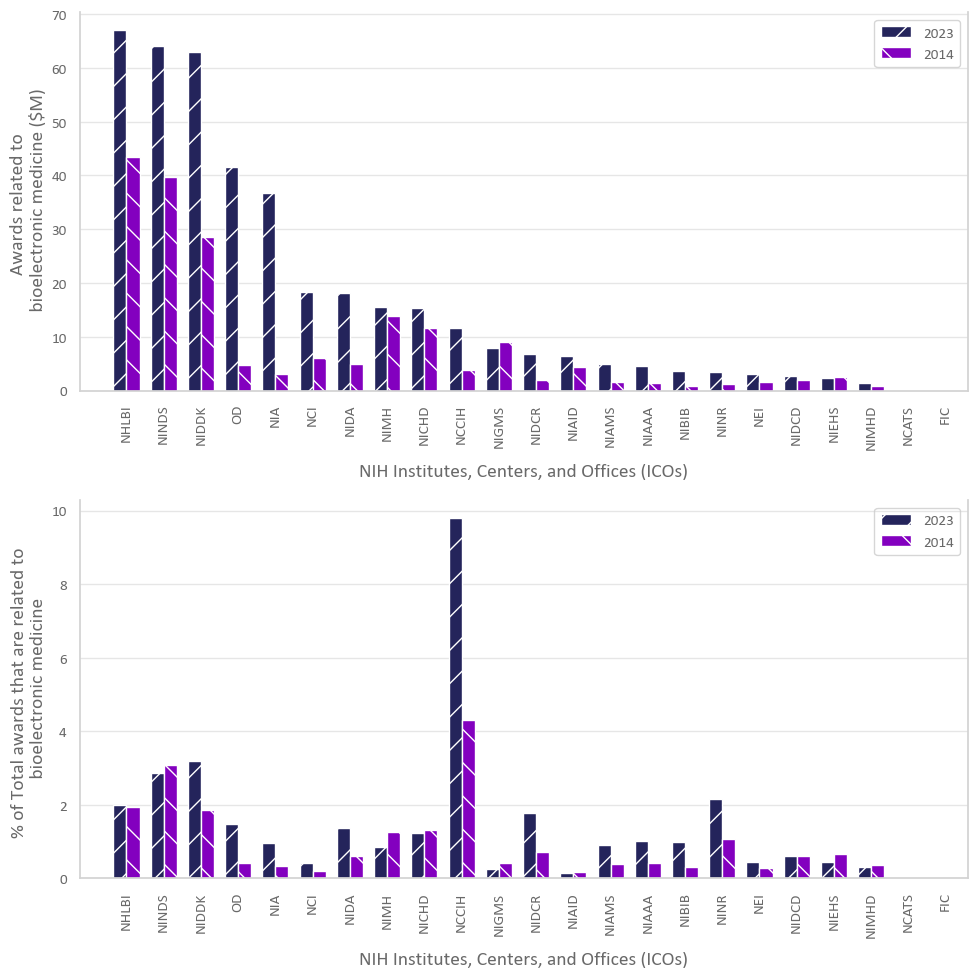

In [11]:
# Initialize figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

## First subplot: NIH ICO specific bioelectronic medicines awards ($)

# Add data
width = 0.35
x = "ICO acronym"
y1 = "2023 total award related to bioelectronic medicine ($M)"
y12 = "2014 total award related to bioelectronic medicine ($M)"
y13 = "diff ($)"
df[y13] = df[y1] - df[y12]

df.plot(x, y1, 
        ax=ax1, kind="bar", color = color1, hatch = "/", width = width, position = 1, label = "2023")
df.plot(x, y12,
        ax=ax1, kind="bar", color= color2, hatch = "\\", width = width, position = 0, label = "2014")
#df.plot(x, y13,
#        ax=ax1, kind="bar", color= color3, hatch = "-", width = width, position = 0, label = "2023 minus 2014")

# Set axis labels
ax1.set_ylabel("Awards related to \n bioelectronic medicine ($M)")
ax1.set_xlabel("NIH Institutes, Centers, and Offices (ICOs)", labelpad = 10)

# Turn off first xtick
labels = ax1.get_xticklabels()
labels[0] =  ""
ax1.set_xticklabels(labels)

# Add grid
ax1.grid(axis='y', color='0.9')
ax1.set_axisbelow(True) # move grid lines below the plot

## Second subplot: NIH ICO specific bioelectronic medicines awards (%)

# Add data
width = 0.35
y2 = "2023 % of total award related to bioelectronic medicine"
y22 = "2014 % of total award related to bioelectronic medicine"
y23 = "diff (%)"
df[y23] = df[y2] - df[y22]

df.plot(x, y2,
        ax=ax2, kind="bar", color = color1,  hatch = "/", width=width, position=1, label = "2023")
df.plot(x, y22,
        ax=ax2, kind="bar", color = color2,  hatch = "\\", width=width, position=0, label = "2014")
#df.plot(x, y23,
#        ax=ax2, kind="bar", color = color3,  hatch = "-", width=width, position=0, label = "2023 minus 2014")

# Set axis labels
ax2.set_ylabel("% of Total awards that are related to \n bioelectronic medicine")
ax2.set_xlabel("NIH Institutes, Centers, and Offices (ICOs)", labelpad = 10)

# Turn off first xtick
labels = ax2.get_xticklabels()
labels[0] =  ""
ax2.set_xticklabels(labels)

# Add grid
ax2.grid(axis='y', color='0.9')
ax2.set_axisbelow(True) # move grid lines below the plot

## Save figure
fig.tight_layout()
save_image(fig, 'output', 'nih-ico-awards-bioelectronic-medicines', 'png')